In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json("file (1).json")

In [4]:
df

,productId,productName,description,brand,category,price,currency,stock,images,variants,dimensions,ratings,reviews
0,1001,Wireless Headphones,Noise-cancelling wireless headphones with Blue...,SoundPro,Electronics,199.99,USD,"{'available': True, 'quantity': 50}","[https://example.com/products/1001/main.jpg, h...","[{'variantId': '1001_01', 'color': 'Black', 'p...","{'weight': '0.5kg', 'width': '18cm', 'height':...","{'averageRating': 4.7, 'numberOfReviews': 120}","[{'reviewId': 501, 'userId': 101, 'username': ..."
1,1002,Smartphone Case,"Durable and shockproof case for smartphones, a...",CaseMate,Accessories,29.99,USD,"{'available': True, 'quantity': 200}","[https://example.com/products/1002/main.jpg, h...","[{'variantId': '1002_01', 'color': 'Black', 'p...","{'weight': '0.2kg', 'width': '8cm', 'height': ...","{'averageRating': 4.4, 'numberOfReviews': 80}","[{'reviewId': 601, 'userId': 103, 'username': ..."
2,1003,4K Ultra HD Smart TV,55-inch 4K Ultra HD Smart TV with built-in Wi-...,Visionary,Electronics,799.99,USD,"{'available': True, 'quantity': 30}","[https://example.com/products/1003/main.jpg, h...","[{'variantId': '1003_01', 'screenSize': '55 in...","{'weight': '15kg', 'width': '123cm', 'height':...","{'averageRating': 4.8, 'numberOfReviews': 250}","[{'reviewId': 701, 'userId': 105, 'username': ..."
3,1004,Bluetooth Speaker,Portable Bluetooth speaker with 12-hour batter...,AudioX,Electronics,59.99,USD,"{'available': True, 'quantity': 100}","[https://example.com/products/1004/main.jpg, h...","[{'variantId': '1004_01', 'color': 'Red', 'pri...","{'weight': '0.3kg', 'width': '15cm', 'height':...","{'averageRating': 4.6, 'numberOfReviews': 150}","[{'reviewId': 801, 'userId': 107, 'username': ..."
4,1005,Winter Jacket,Men's water-resistant winter jacket with a fur...,ColdTech,Clothing,129.99,USD,"{'available': True, 'quantity': 80}","[https://example.com/products/1005/main.jpg, h...","[{'variantId': '1005_01', 'size': 'M', 'color'...","{'weight': '1.5kg', 'width': '60cm', 'height':...","{'averageRating': 4.5, 'numberOfReviews': 60}","[{'reviewId': 901, 'userId': 109, 'username': ..."


In [5]:
df.shape

(5, 13)

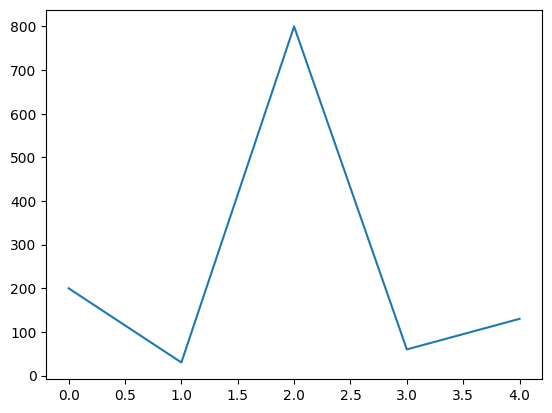

In [6]:
plt.plot(df["price"])

In [8]:
from pandas import json_normalize
import json

In [34]:
with open("file (1).json", "r") as file:
    data = json.load(file)

df = pd.json_normalize(data)
df

,productId,productName,description,brand,category,price,currency,images,variants,reviews,stock.available,stock.quantity,dimensions.weight,dimensions.width,dimensions.height,dimensions.depth,ratings.averageRating,ratings.numberOfReviews
0,1001,Wireless Headphones,Noise-cancelling wireless headphones with Blue...,SoundPro,Electronics,199.99,USD,"[https://example.com/products/1001/main.jpg, h...","[{'variantId': '1001_01', 'color': 'Black', 'p...","[{'reviewId': 501, 'userId': 101, 'username': ...",True,50,0.5kg,18cm,20cm,8cm,4.7,120
1,1002,Smartphone Case,"Durable and shockproof case for smartphones, a...",CaseMate,Accessories,29.99,USD,"[https://example.com/products/1002/main.jpg, h...","[{'variantId': '1002_01', 'color': 'Black', 'p...","[{'reviewId': 601, 'userId': 103, 'username': ...",True,200,0.2kg,8cm,15cm,1cm,4.4,80
2,1003,4K Ultra HD Smart TV,55-inch 4K Ultra HD Smart TV with built-in Wi-...,Visionary,Electronics,799.99,USD,"[https://example.com/products/1003/main.jpg, h...","[{'variantId': '1003_01', 'screenSize': '55 in...","[{'reviewId': 701, 'userId': 105, 'username': ...",True,30,15kg,123cm,80cm,10cm,4.8,250
3,1004,Bluetooth Speaker,Portable Bluetooth speaker with 12-hour batter...,AudioX,Electronics,59.99,USD,"[https://example.com/products/1004/main.jpg, h...","[{'variantId': '1004_01', 'color': 'Red', 'pri...","[{'reviewId': 801, 'userId': 107, 'username': ...",True,100,0.3kg,15cm,8cm,5cm,4.6,150
4,1005,Winter Jacket,Men's water-resistant winter jacket with a fur...,ColdTech,Clothing,129.99,USD,"[https://example.com/products/1005/main.jpg, h...","[{'variantId': '1005_01', 'size': 'M', 'color'...","[{'reviewId': 901, 'userId': 109, 'username': ...",True,80,1.5kg,60cm,85cm,5cm,4.5,60


In [35]:
columns_to_clean = ["dimensions.weight", "dimensions.width", "dimensions.height", "dimensions.depth"]
for col in columns_to_clean:
  df[col] = df[col].astype(str).str.replace(r"[^\d.]", "", regex = True)
  df[col] = pd.to_numeric(df[col], errors = "coerce")

In [36]:
df

,productId,productName,description,brand,category,price,currency,images,variants,reviews,stock.available,stock.quantity,dimensions.weight,dimensions.width,dimensions.height,dimensions.depth,ratings.averageRating,ratings.numberOfReviews
0,1001,Wireless Headphones,Noise-cancelling wireless headphones with Blue...,SoundPro,Electronics,199.99,USD,"[https://example.com/products/1001/main.jpg, h...","[{'variantId': '1001_01', 'color': 'Black', 'p...","[{'reviewId': 501, 'userId': 101, 'username': ...",True,50,0.5,18,20,8,4.7,120
1,1002,Smartphone Case,"Durable and shockproof case for smartphones, a...",CaseMate,Accessories,29.99,USD,"[https://example.com/products/1002/main.jpg, h...","[{'variantId': '1002_01', 'color': 'Black', 'p...","[{'reviewId': 601, 'userId': 103, 'username': ...",True,200,0.2,8,15,1,4.4,80
2,1003,4K Ultra HD Smart TV,55-inch 4K Ultra HD Smart TV with built-in Wi-...,Visionary,Electronics,799.99,USD,"[https://example.com/products/1003/main.jpg, h...","[{'variantId': '1003_01', 'screenSize': '55 in...","[{'reviewId': 701, 'userId': 105, 'username': ...",True,30,15.0,123,80,10,4.8,250
3,1004,Bluetooth Speaker,Portable Bluetooth speaker with 12-hour batter...,AudioX,Electronics,59.99,USD,"[https://example.com/products/1004/main.jpg, h...","[{'variantId': '1004_01', 'color': 'Red', 'pri...","[{'reviewId': 801, 'userId': 107, 'username': ...",True,100,0.3,15,8,5,4.6,150
4,1005,Winter Jacket,Men's water-resistant winter jacket with a fur...,ColdTech,Clothing,129.99,USD,"[https://example.com/products/1005/main.jpg, h...","[{'variantId': '1005_01', 'size': 'M', 'color'...","[{'reviewId': 901, 'userId': 109, 'username': ...",True,80,1.5,60,85,5,4.5,60


In [37]:
df["num_variants"] = df["variants"].apply(len)
df["num_reviews"] = df["reviews"].apply(len)
df["num_images"] = df["images"].apply(len)
df

,productId,productName,description,brand,category,price,currency,images,variants,reviews,...,stock.quantity,dimensions.weight,dimensions.width,dimensions.height,dimensions.depth,ratings.averageRating,ratings.numberOfReviews,num_variants,num_reviews,num_images
0,1001,Wireless Headphones,Noise-cancelling wireless headphones with Blue...,SoundPro,Electronics,199.99,USD,"[https://example.com/products/1001/main.jpg, h...","[{'variantId': '1001_01', 'color': 'Black', 'p...","[{'reviewId': 501, 'userId': 101, 'username': ...",...,50,0.5,18,20,8,4.7,120,2,2,2
1,1002,Smartphone Case,"Durable and shockproof case for smartphones, a...",CaseMate,Accessories,29.99,USD,"[https://example.com/products/1002/main.jpg, h...","[{'variantId': '1002_01', 'color': 'Black', 'p...","[{'reviewId': 601, 'userId': 103, 'username': ...",...,200,0.2,8,15,1,4.4,80,2,2,2
2,1003,4K Ultra HD Smart TV,55-inch 4K Ultra HD Smart TV with built-in Wi-...,Visionary,Electronics,799.99,USD,"[https://example.com/products/1003/main.jpg, h...","[{'variantId': '1003_01', 'screenSize': '55 in...","[{'reviewId': 701, 'userId': 105, 'username': ...",...,30,15.0,123,80,10,4.8,250,1,2,2
3,1004,Bluetooth Speaker,Portable Bluetooth speaker with 12-hour batter...,AudioX,Electronics,59.99,USD,"[https://example.com/products/1004/main.jpg, h...","[{'variantId': '1004_01', 'color': 'Red', 'pri...","[{'reviewId': 801, 'userId': 107, 'username': ...",...,100,0.3,15,8,5,4.6,150,2,2,2
4,1005,Winter Jacket,Men's water-resistant winter jacket with a fur...,ColdTech,Clothing,129.99,USD,"[https://example.com/products/1005/main.jpg, h...","[{'variantId': '1005_01', 'size': 'M', 'color'...","[{'reviewId': 901, 'userId': 109, 'username': ...",...,80,1.5,60,85,5,4.5,60,2,2,2


In [19]:
file_a =  {
    "productId": 1001,
    "productName": "Wireless Headphones",
    "description": "Noise-cancelling wireless headphones with Bluetooth 5.0 and 20-hour battery life.",
    "brand": "SoundPro",
    "category": "Electronics",
    "price": 199.99,
    "currency": "USD",
    "stock": {
      "available": True,
      "quantity": 50
    },
    "images": [
      "https://example.com/products/1001/main.jpg",
      "https://example.com/products/1001/side.jpg"
    ],
    "variants": [
      {
        "variantId": "1001_01",
        "color": "Black",
        "price": 199.99,
        "stockQuantity": 20
      },
      {
        "variantId": "1001_02",
        "color": "White",
        "price": 199.99,
        "stockQuantity": 30
      }
    ]
}
def f(json):
    flat_a = []
    def fl(json):
        for x in json:
            #print(type(x))
            if str(type(x)) == "<class 'dict'>":
                fl(x)
            else:
                flat_a.append(x)
    fl(json)
    return flat_a

In [20]:
a = {"stock": {
      "available": True,
      "quantity": 50
    }
}
str(type(a))

"<class 'dict'>"

In [21]:
f(file_a)

['productId',
 'productName',
 'description',
 'brand',
 'category',
 'price',
 'currency',
 'stock',
 'images',
 'variants']